# Import Libraries and Mount Drive

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import MaxAbsScaler, Normalizer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import accuracy_score, adjusted_mutual_info_score
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage
from scipy.stats import mode

In [103]:
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Read in Data

In [104]:
data = pd.read_csv("/content/drive/MyDrive/DSC_43C8/hw1/vehicles.csv")

In [105]:
data.head()

,Sports,SUV,Wagon,Minivan,Pickup,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


# Check for Columns == 0 and Drop

In [106]:
zeros_check = np.zeros_like(data.columns)
for i in range(len(data.columns)):
  if(np.all(data.iloc[:, i] == 0)):
    zeros_check[i] = 1
  else:
    zeros_check[i] = 0

drop_idx = int(np.where(zeros_check == 1)[0][0])

data_2 = data.drop(data.columns[drop_idx], axis = 1, inplace = False)
data_2.head()

,Sports,SUV,Wagon,Minivan,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
Acura 3.5 RL,0,0,0,0,0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
Acura 3.5 RL Navigation,0,0,0,0,0,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
Acura MDX,0,1,0,0,1,0,36945,33337,3.5,6,265,17,23,4451,106,189,77
Acura NSX S,1,0,0,0,0,1,89765,79978,3.2,6,290,17,24,3153,100,174,71
Acura RSX,0,0,0,0,0,0,23820,21761,2.0,4,200,24,31,2778,101,172,68


# Normalize and Do PCA

First, separate target variable

In [107]:
data_3 = data_2.copy()
data_3['SUV'] = np.where(data['SUV'] == 1, 2, data['SUV'])
data_3['Wagon'] = np.where(data['Wagon'] == 1, 3, data['Wagon'])
data_3['Minivan'] = np.where(data['Minivan'] == 1, 4, data['Minivan'])
data_3['VehicleType'] = data_3['Sports'] + data_3['SUV'] + data_3['Wagon'] + data_3['Minivan']
data_4 = data_3.drop(['Sports', 'SUV', 'Wagon', 'Minivan'], axis = 1, inplace = False)
target = data_4['VehicleType']
data_5 = data_4.drop('VehicleType', axis = 1, inplace = False)

In [108]:
data_5_ss = pd.DataFrame(StandardScaler().fit_transform(data_5), columns = data_5.columns, index = data_5.index)
data_5_mm = pd.DataFrame(MinMaxScaler().fit_transform(data_5), columns = data_5.columns, index = data_5.index)
data_5_rob = pd.DataFrame(RobustScaler().fit_transform(data_5), columns = data_5.columns, index = data_5.index)
data_5_abs = pd.DataFrame(MaxAbsScaler().fit_transform(data_5), columns = data_5.columns, index = data_5.index)
data_5_norm = pd.DataFrame(Normalizer().fit_transform(data_5), columns = data_5.columns, index = data_5.index)

In [109]:
# Define doPCA function

def doPCA(data):
  pca = PCA()
  newData = pca.fit_transform(data)
  newData_load = pca.components_
  exp_var = pca.explained_variance_
  evr = pca.explained_variance_ratio_

  return newData, newData_load, exp_var, evr

In [110]:
ss_PCA_data, ss_PCA_data_load, ss_exp_var, ss_evr = doPCA(data_5_ss)
mm_PCA_data, mm_PCA_data_load, mm_exp_var, mm_evr = doPCA(data_5_mm)
rob_PCA_data, rob_PCA_data_load, rob_exp_var, rob_evr = doPCA(data_5_rob)
abs_PCA_data, abs_PCA_data_load, abs_exp_var, abs_evr = doPCA(data_5_abs)
norm_PCA_data, norm_PCA_data_load, norm_exp_var, norm_evr = doPCA(data_5_norm)

In [111]:
ss_PCA_df = pd.DataFrame(ss_PCA_data_load, index = data_5_ss.columns, columns = ('PC' + str(i) for i in range(data_5_ss.shape[1])))
mm_PCA_df = pd.DataFrame(mm_PCA_data_load, index = data_5_mm.columns, columns = ('PC' + str(i) for i in range(data_5_mm.shape[1])))
rob_PCA_df = pd.DataFrame(rob_PCA_data_load, index = data_5_rob.columns, columns = ('PC' + str(i) for i in range(data_5_rob.shape[1])))
abs_PCA_df = pd.DataFrame(abs_PCA_data_load, index = data_5_abs.columns, columns = ('PC' + str(i) for i in range(data_5_abs.shape[1])))
norm_PCA_df = pd.DataFrame(norm_PCA_data_load, index = data_5_norm.columns, columns = ('PC' + str(i) for i in range(data_5_norm.shape[1])))

In [112]:
print(ss_PCA_df.iloc[:, 0:4])

                 PC0       PC1       PC2       PC3
AWD        -0.086665 -0.126048 -0.265952 -0.264523
RWD        -0.148987  0.426105  0.412498  0.414367
Retail      0.714694 -0.332243  0.046027  0.044190
Dealer      0.216752 -0.446662  0.356367  0.357862
Engine      0.569362  0.644049 -0.117769 -0.122308
Cylinders   0.070131  0.248570  0.213202  0.221611
Horsepower -0.163410 -0.002857  0.046470  0.032195
CityMPG    -0.227256 -0.041754  0.039270  0.055795
HighwayMPG  0.031709 -0.001877 -0.227697 -0.226370
Weight      0.033238 -0.092277  0.014357  0.029006
Wheelbase   0.054188 -0.075175  0.103649  0.103742
Length      0.005321 -0.011994  0.027939  0.032153
Width      -0.003007 -0.001651  0.709505 -0.704421


# PCA Biplots

Text(0, 0.5, 'PC2')

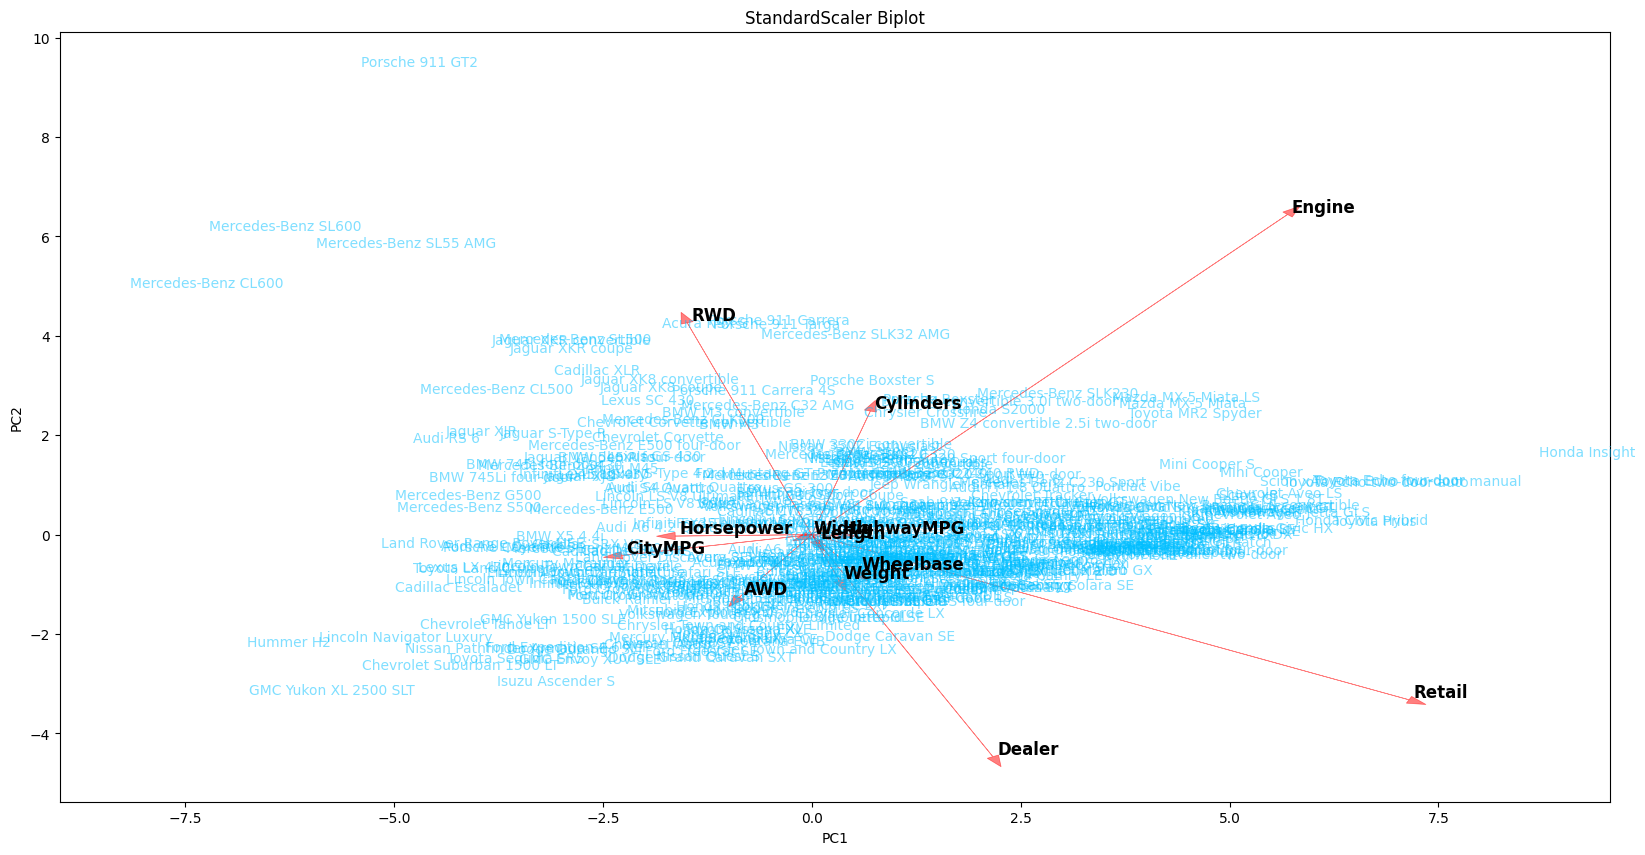

In [113]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(ss_PCA_data)):
  plt.scatter(ss_PCA_data[i,0], ss_PCA_data[i,1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(ss_PCA_data[i,0], ss_PCA_data[i, 1], data_5_ss.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)

scale = 10
for k in range(data_5_ss.shape[1]):
  plt.text(ss_PCA_df.iloc[k,0] * scale + 0.05,
           ss_PCA_df.iloc[k,1] * scale + 0.05,
           ss_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, ss_PCA_df.iloc[k, 0] * scale, ss_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.title("StandardScaler Biplot")
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

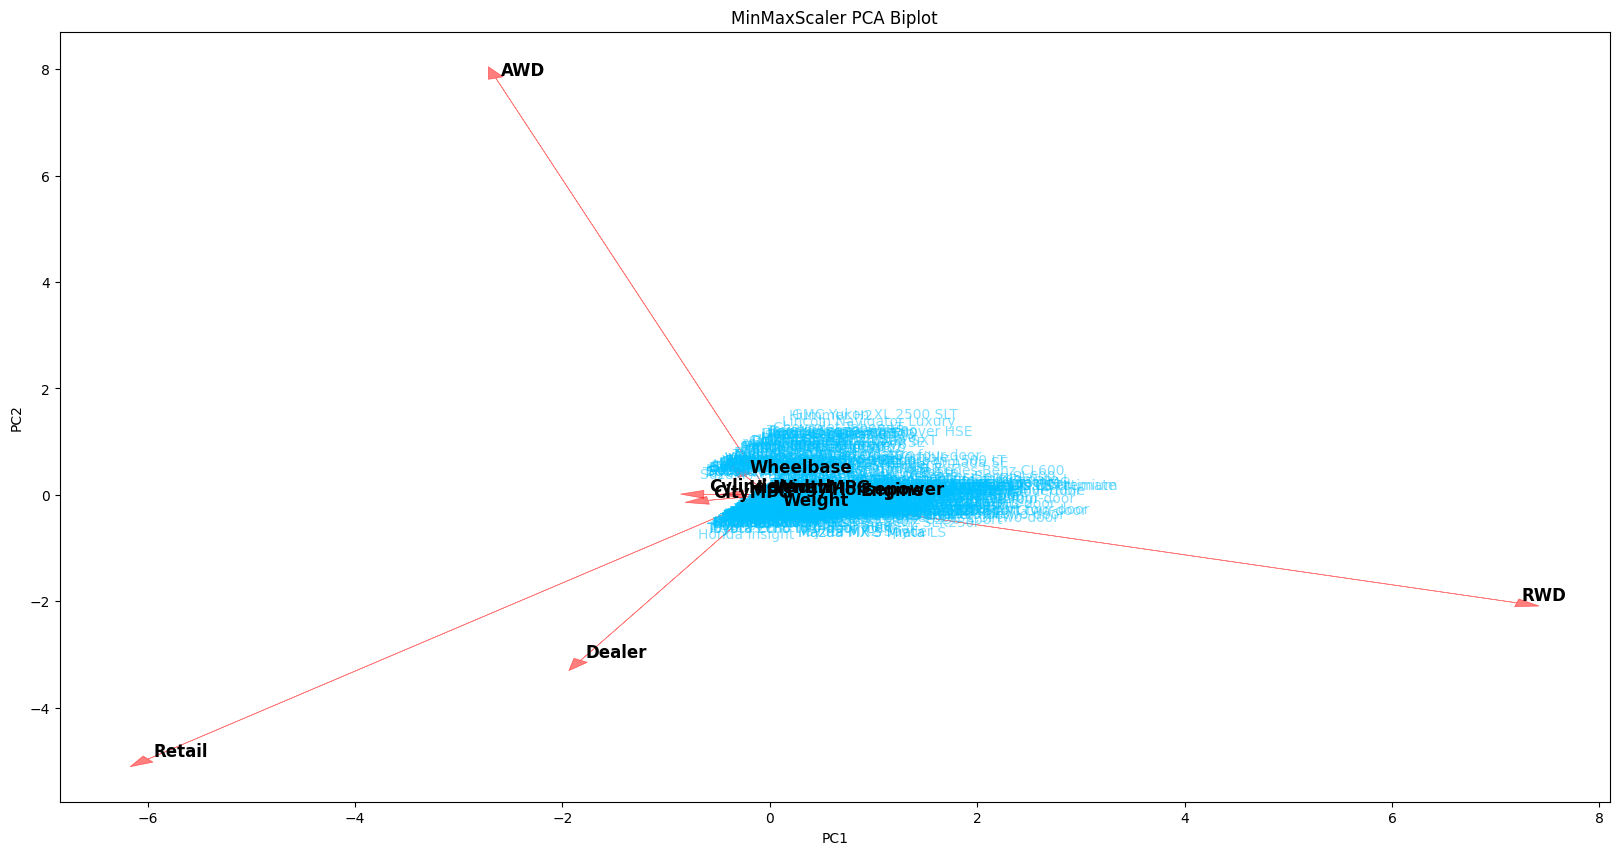

In [114]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(mm_PCA_data)):
  plt.scatter(mm_PCA_data[i,0], mm_PCA_data[i,1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(mm_PCA_data[i,0], mm_PCA_data[i, 1], data_5_mm.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)

for k in range(data_5_mm.shape[1]):
  plt.text(mm_PCA_df.iloc[k,0] * scale + 0.05,
           mm_PCA_df.iloc[k,1] * scale + 0.05,
           mm_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, mm_PCA_df.iloc[k, 0] * scale, mm_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.title('MinMaxScaler PCA Biplot')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0.5, 1.0, 'RobustScaler PCA Biplot')

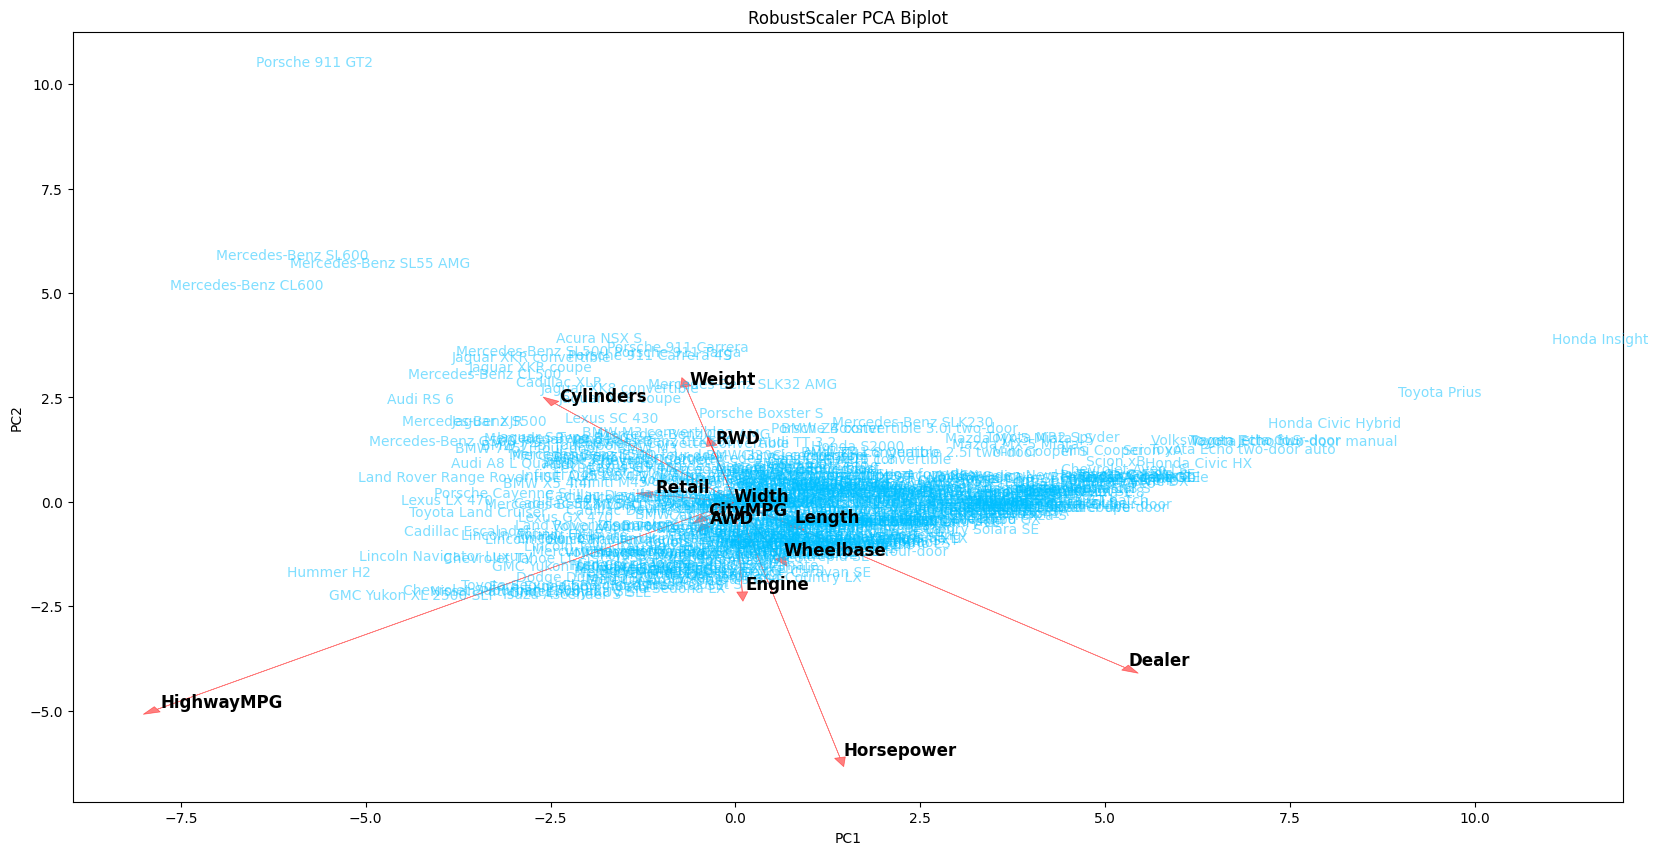

In [115]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(rob_PCA_data)):
  plt.scatter(rob_PCA_data[i,0], rob_PCA_data[i,1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(rob_PCA_data[i,0], rob_PCA_data[i, 1], data_5_rob.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)

#Draw Var
scale = 10
for k in range(data_5_rob.shape[1]):
  plt.text(rob_PCA_df.iloc[k,0] * scale + 0.05,
           rob_PCA_df.iloc[k,1] * scale + 0.05,
           rob_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, rob_PCA_df.iloc[k, 0] * scale, rob_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("RobustScaler PCA Biplot")

Text(0.5, 1.0, 'MaxAbsScaler PCA Biplot')

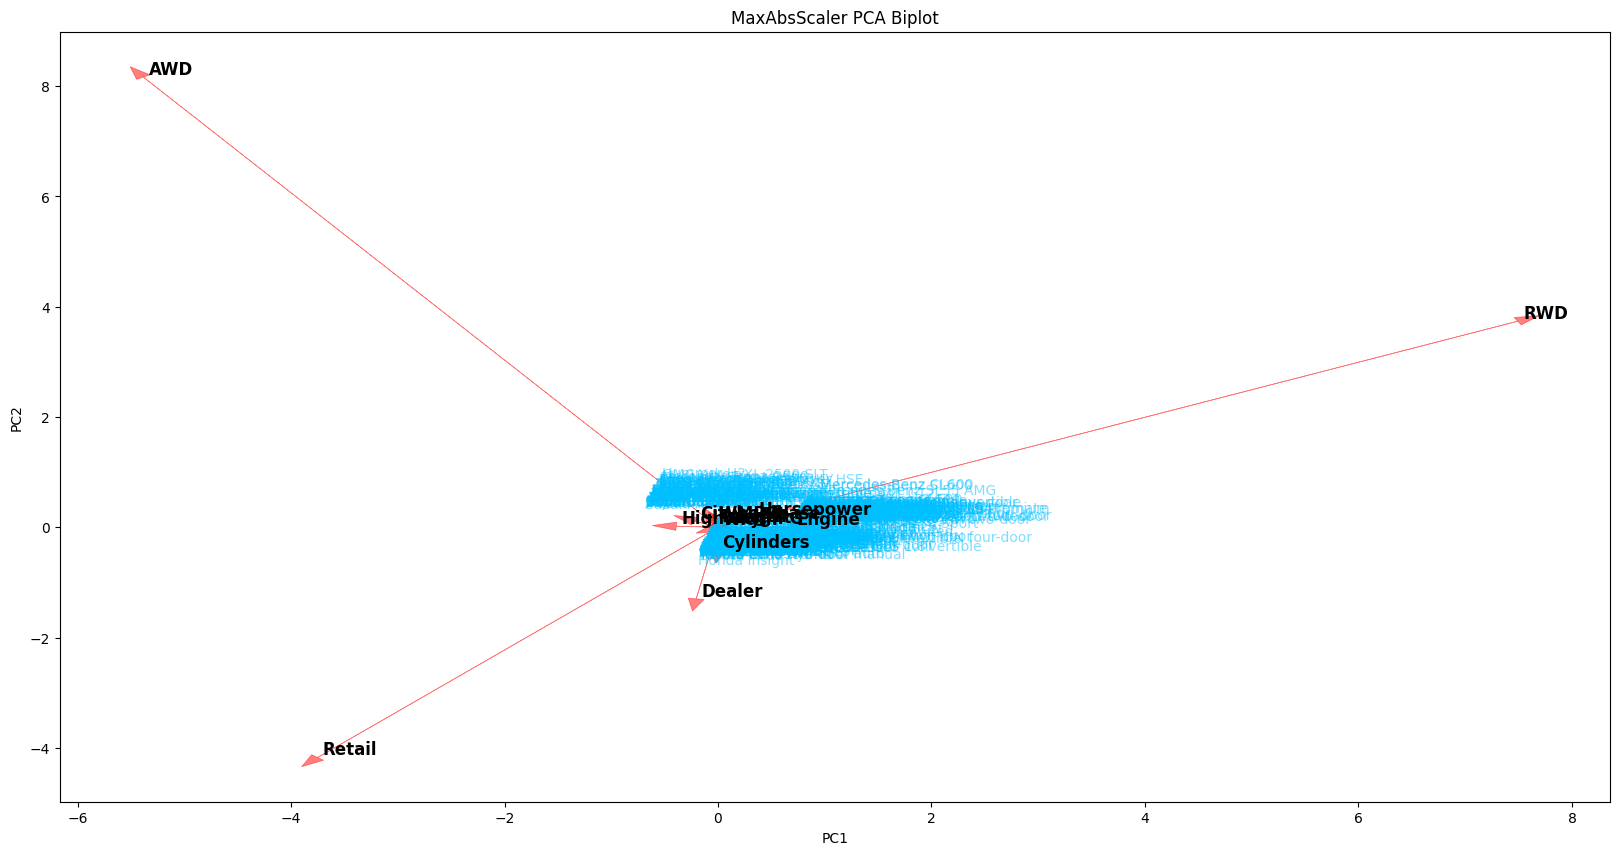

In [116]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(abs_PCA_data)):
  plt.scatter(abs_PCA_data[i,0], abs_PCA_data[i,1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(abs_PCA_data[i,0], abs_PCA_data[i, 1], data_5_abs.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)

for k in range(data_5_abs.shape[1]):
  plt.text(abs_PCA_df.iloc[k,0] * scale + 0.05,
           abs_PCA_df.iloc[k,1] * scale + 0.05,
           abs_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, abs_PCA_df.iloc[k, 0] * scale, abs_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("MaxAbsScaler PCA Biplot")

Text(0.5, 1.0, 'Normalizer PCA Biplot')

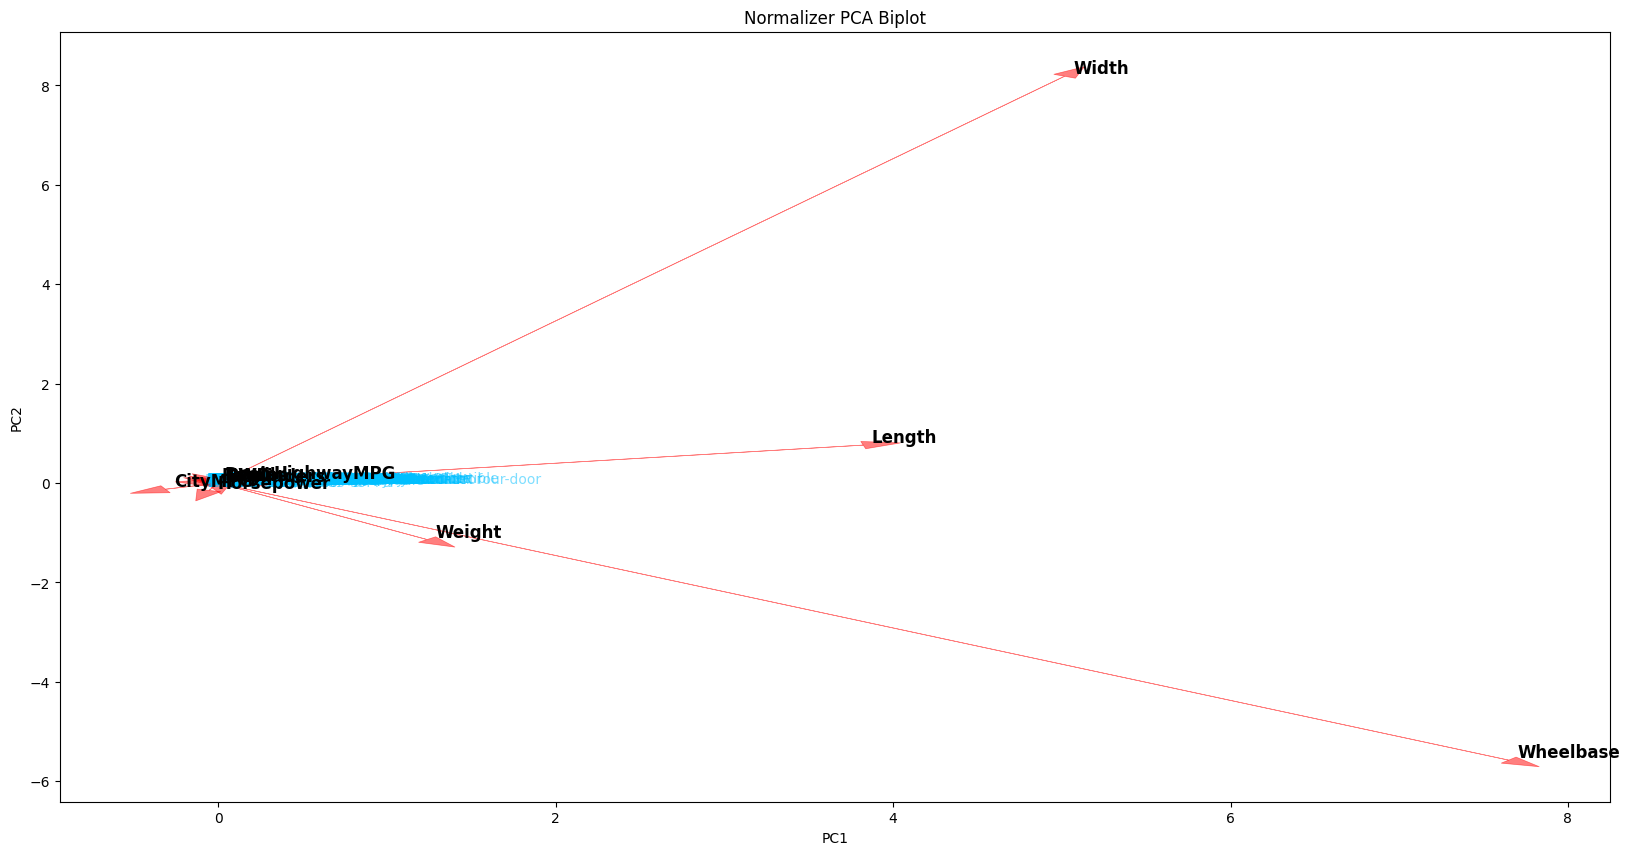

In [117]:
fig = plt.figure(figsize = (20, 10))
for i in range(len(norm_PCA_data)):
  plt.scatter(norm_PCA_data[i,0], norm_PCA_data[i,1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(norm_PCA_data[i,0], norm_PCA_data[i, 1], data_5_norm.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)

for k in range(data_5_norm.shape[1]):
  plt.text(norm_PCA_df.iloc[k,0] * scale + 0.05,
           norm_PCA_df.iloc[k,1] * scale + 0.05,
           norm_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, norm_PCA_df.iloc[k, 0] * scale, norm_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Normalizer PCA Biplot")

In [118]:
# Compare average explained variance for each normalization method
print("Average Explained Variances\n")
print("StandardScaler: ", np.average(ss_exp_var))
print("MinMaxScaler: ", np.average(mm_exp_var))
print("RobustScaler: ", np.average(rob_exp_var))
print("MaxAbsScaler: ", np.average(abs_exp_var))
print("Normalizer: ", np.average(norm_exp_var))

# StandardScaler has the best explained variance value

Average Explained Variances

StandardScaler:  1.0025906735751295
MinMaxScaler:  0.04749284858199272
RobustScaler:  0.7883462149944893
MaxAbsScaler:  0.03589331575071652
Normalizer:  7.841796790731055e-05


In [119]:
# Compare average explained varince ratios for each normalization method

print("Average Explained Variance Ratios\n")
print("StandardScaler: ", np.average(ss_evr))
print("MinMaxScaler: ", np.average(mm_evr))
print("RobustScaler: ", np.average(rob_evr))
print("MaxAbsScaler: ", np.average(abs_evr))
print("Normalizer: ", np.average(norm_evr))

# All 5 normalization methods had the same ever except for RobustScaler which has less

Average Explained Variance Ratios

StandardScaler:  0.07692307692307693
MinMaxScaler:  0.07692307692307691
RobustScaler:  0.0769230769230769
MaxAbsScaler:  0.07692307692307691
Normalizer:  0.07692307692307689


# KMeans and Hierarchical Clustering

In [120]:
def resolve_mapping(prediction, target):
	pred_labels = np.zeros_like(target)

	for i in range(len(np.unique(target))):
		mask = (prediction == i)
		pred_labels[mask] = mode(target[mask])[0]

	return pred_labels

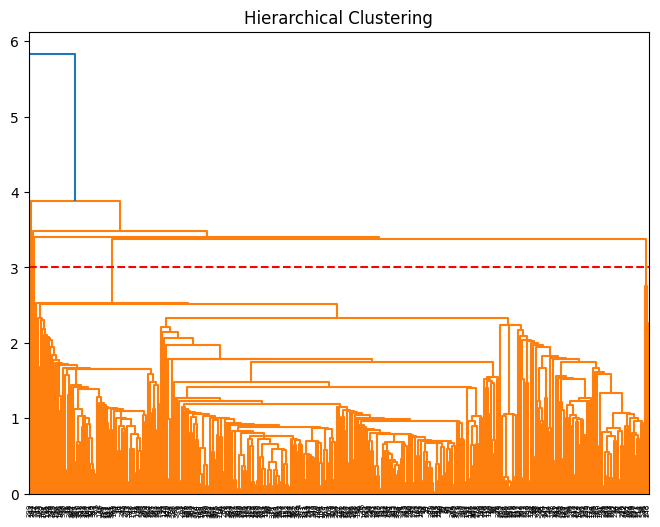

Hierarchical Silhouette Score:  0.44627714493733645
Hierarchical Calinski Harabasz Score:  22.06239720198022
Hierarchical AMI Score:  0.01948596439781527
Hierarchical Accuracy Score:  0.6124031007751938


<ipython-input-120-68e40a8801c4>:6: RuntimeWarning: invalid value encountered in cast
  pred_labels[mask] = mode(target[mask])[0]


In [121]:
linked = linkage(ss_PCA_data)

target_arr = np.array(target)

plt.figure(figsize = (8, 6))
dendrogram(linked)
plt.axhline(y = 3, color = 'r', linestyle = '--')
plt.title("Hierarchical Clustering")
plt.xlabel("")

plt.show()

cluster_labels = fcluster(linked, t = 3, criterion = 'distance')
ss_h_labels = resolve_mapping(cluster_labels, target_arr)
ss_h_sil_score = silhouette_score(ss_PCA_data, ss_h_labels)
cal_har_h_score = calinski_harabasz_score(ss_PCA_data, ss_h_labels)
ami_h = adjusted_mutual_info_score(target_arr, ss_h_labels)
acc_h_score = accuracy_score(target_arr, ss_h_labels)
print("Hierarchical Silhouette Score: ", ss_h_sil_score)
print("Hierarchical Calinski Harabasz Score: ", cal_har_h_score)
print("Hierarchical AMI Score: ", ami_h)
print("Hierarchical Accuracy Score: ", acc_h_score)

In [122]:
num_cluster = 5
this_cluster = 1
km = KMeans(n_clusters = num_cluster, random_state = 0)
label = km.fit_predict(ss_PCA_data)
min_number = data.shape[0]
for i in range(num_cluster):
  t = np.sum(label == i)
  if t < min_number:
    min_number = t
    this_cluster = i
print('\n The smallest cluster has ' + str(np.sum(label == this_cluster)) + " entries\n")
print(data[label == this_cluster])


ss_labels = resolve_mapping(label, target)
ss_sil_score = silhouette_score(ss_PCA_data, ss_labels)
cal_har_score = calinski_harabasz_score(ss_PCA_data, ss_labels)
ami = adjusted_mutual_info_score(target, ss_labels)
acc_score = accuracy_score(target, ss_labels)
print("KMeans Silhouette Score: ", ss_sil_score)
print("KMeans Calinski Harabasz Score: ", cal_har_score)
print("KMeans AMI Score: ", ami)
print("KMeans Accuracy Score: ", acc_score)


 The smallest cluster has 39 entries

                                Sports  SUV  Wagon  Minivan  Pickup  AWD  RWD  \
Acura NSX S                          1    0      0        0       0    0    1   
Audi RS 6                            1    0      0        0       0    0    0   
BMW 545iA four-door                  0    0      0        0       0    0    1   
BMW 745i four-door                   0    0      0        0       0    0    1   
BMW 745Li four-door                  0    0      0        0       0    0    1   
BMW M3                               1    0      0        0       0    0    1   
BMW M3 convertible                   1    0      0        0       0    0    1   
Cadillac XLR                         1    0      0        0       0    0    1   
Chevrolet Corvette                   1    0      0        0       0    0    1   
Chevrolet Corvette convertible       1    0      0        0       0    0    1   
Infiniti M45                         0    0      0        0       0   

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


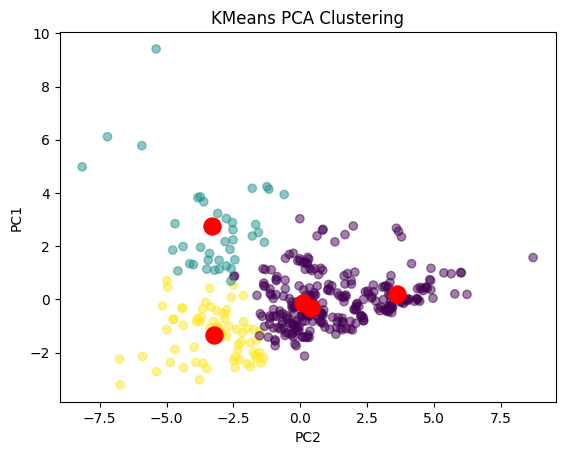

In [123]:
# Plot and visualize our KMeans Clustering

centroids = km.cluster_centers_
plt.title('KMeans PCA Clustering')
plt.ylabel('PC1')
plt.xlabel('PC2')
plt.scatter(ss_PCA_data[:, 0], ss_PCA_data[:, 1], c = ss_labels, cmap = 'viridis', alpha = 0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s = 150, c = 'red')

Text(0.5, 1.0, 'PCA Biplot With Outliers')

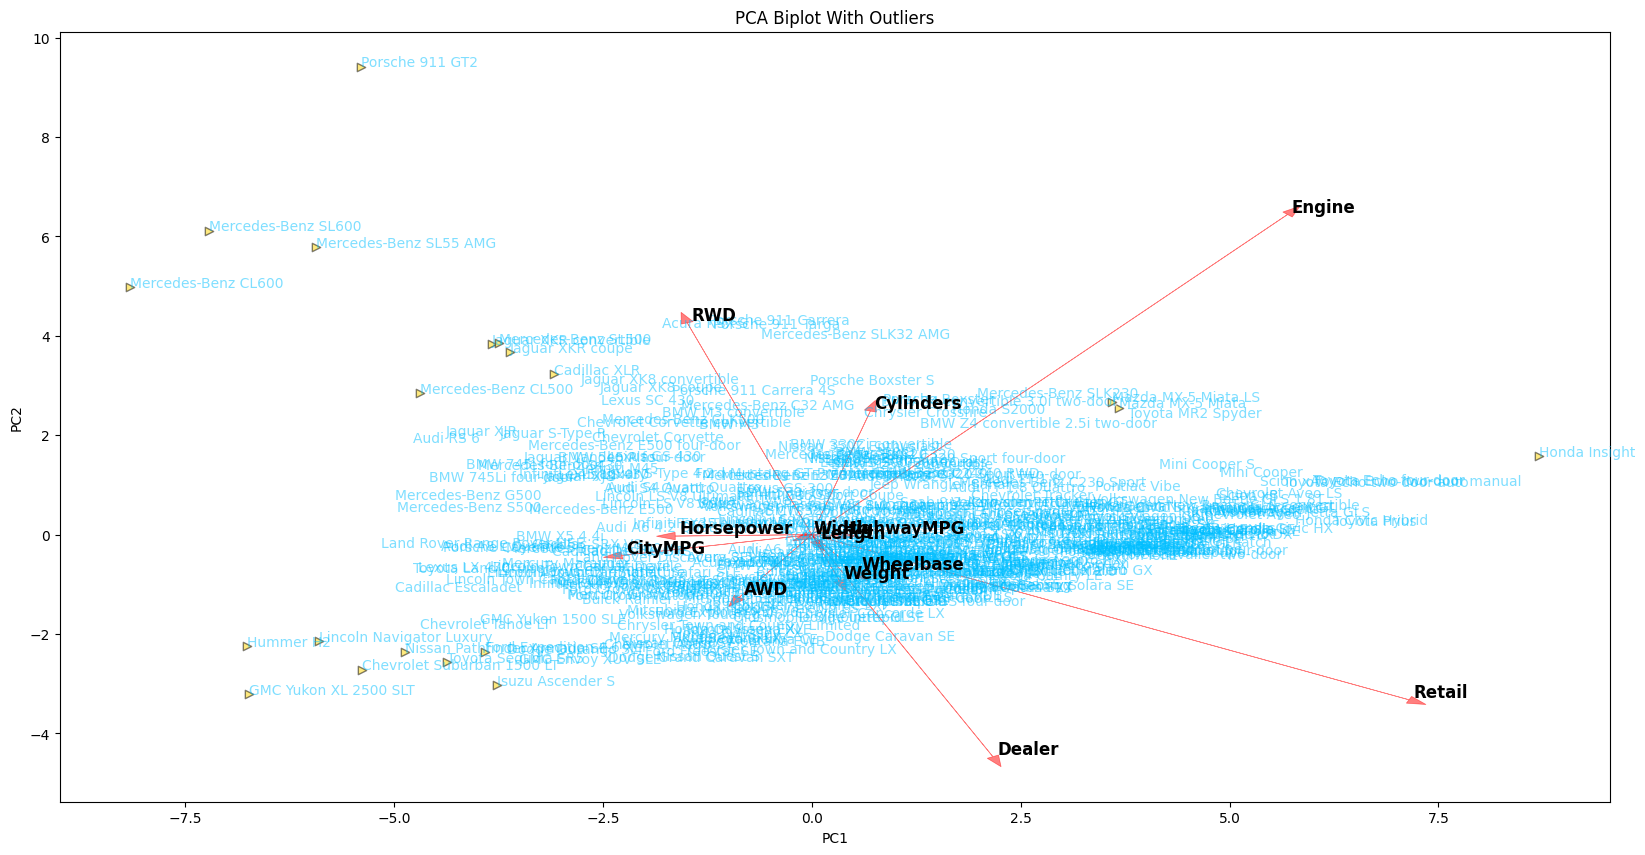

In [124]:
dim = 2
outlier_data = ss_PCA_data[:, 0:dim]
outlier_data_norm = np.zeros(len(outlier_data))

for i in range(len(outlier_data)):
  outlier_data_norm[i] = outlier_data[i, 0]**2 * outlier_data[i, 1] **2
sorted_new_data_2_norm = -np.sort(-outlier_data_norm)
norm_idx = np.argsort(-outlier_data_norm)

top_rank_num = 20
pca_ranked_idx = norm_idx[0:top_rank_num]

idx_list = list(data_2.index)
outlier_idx_list = []
fig = plt.figure(figsize = (20, 10))
for i in range(len(ss_PCA_data)):
  plt.scatter(ss_PCA_data[i, 0], ss_PCA_data[i, 1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(ss_PCA_data[i, 0], ss_PCA_data[i, 1], data_5_ss.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)
  if i in pca_ranked_idx:
    plt.scatter(ss_PCA_data[i, 0], ss_PCA_data[i, 1], marker = '>', color = 'gold', edgecolor = 'k', alpha = 0.5)
    outlier_idx_list.append(idx_list[i])

outliers_df = data_2.loc[data_2.index.isin(outlier_idx_list)]

scale = 10
for k in range(data_5_ss.shape[1]):
  plt.text(ss_PCA_df.iloc[k,0] * scale + 0.05,
           ss_PCA_df.iloc[k,1] * scale + 0.05,
           ss_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, ss_PCA_df.iloc[k, 0] * scale, ss_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Biplot With Outliers")

In [126]:
outliers_df.reset_index(inplace = True)
outliers_df

,index,Sports,SUV,Wagon,Minivan,AWD,RWD,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,Cadillac XLR,1,0,0,0,0,1,76200,70546,4.6,8,320,17,25,3647,106,178,72
1,Chevrolet Suburban 1500 LT,0,1,0,0,0,0,42735,37422,5.3,8,295,14,18,4947,130,219,79
2,Ford Expedition 4.6 XLT,0,1,0,0,0,0,34560,30468,4.6,8,232,15,19,5000,119,206,79
3,GMC Yukon XL 2500 SLT,0,1,0,0,1,0,46265,40534,6.0,8,325,13,17,6133,130,219,79
4,Honda Insight,0,0,0,0,0,0,19110,17911,2.0,3,73,60,66,1850,95,155,67
5,Hummer H2,0,1,0,0,1,0,49995,45815,6.0,8,316,10,12,6400,123,190,81
6,Isuzu Ascender S,0,1,0,0,1,0,31849,29977,4.2,6,275,15,20,4967,129,208,76
7,Jaguar XKR coupe,1,0,0,0,0,1,81995,74676,4.2,8,390,16,23,3865,102,187,71
8,Jaguar XKR convertible,1,0,0,0,0,1,86995,79226,4.2,8,390,16,23,4042,102,187,71
9,Lincoln Navigator Luxury,0,1,0,0,1,0,52775,46360,5.4,8,300,13,18,5969,119,206,80


In [127]:
outliers_df['index']

,index
0,Cadillac XLR
1,Chevrolet Suburban 1500 LT
2,Ford Expedition 4.6 XLT
3,GMC Yukon XL 2500 SLT
4,Honda Insight
5,Hummer H2
6,Isuzu Ascender S
7,Jaguar XKR coupe
8,Jaguar XKR convertible
9,Lincoln Navigator Luxury


In [128]:
def nsva_ranking(data_):
	if np.sum(np.sum(data_<0))>0:
			raise Exception("Data must be a nonnegative matrix\n")
	u,s,v = np.linalg.svd(data_, full_matrices = False)
	ranking_score = -u[:, 0]

	idx_srt = np.argsort(ranking_score)[::-1]
	idx_list = np.arange(data_.shape[0])

	return ranking_score, idx_list[idx_srt]

Text(0.5, 1.0, 'PCA Biplot With nSVA Outliers')

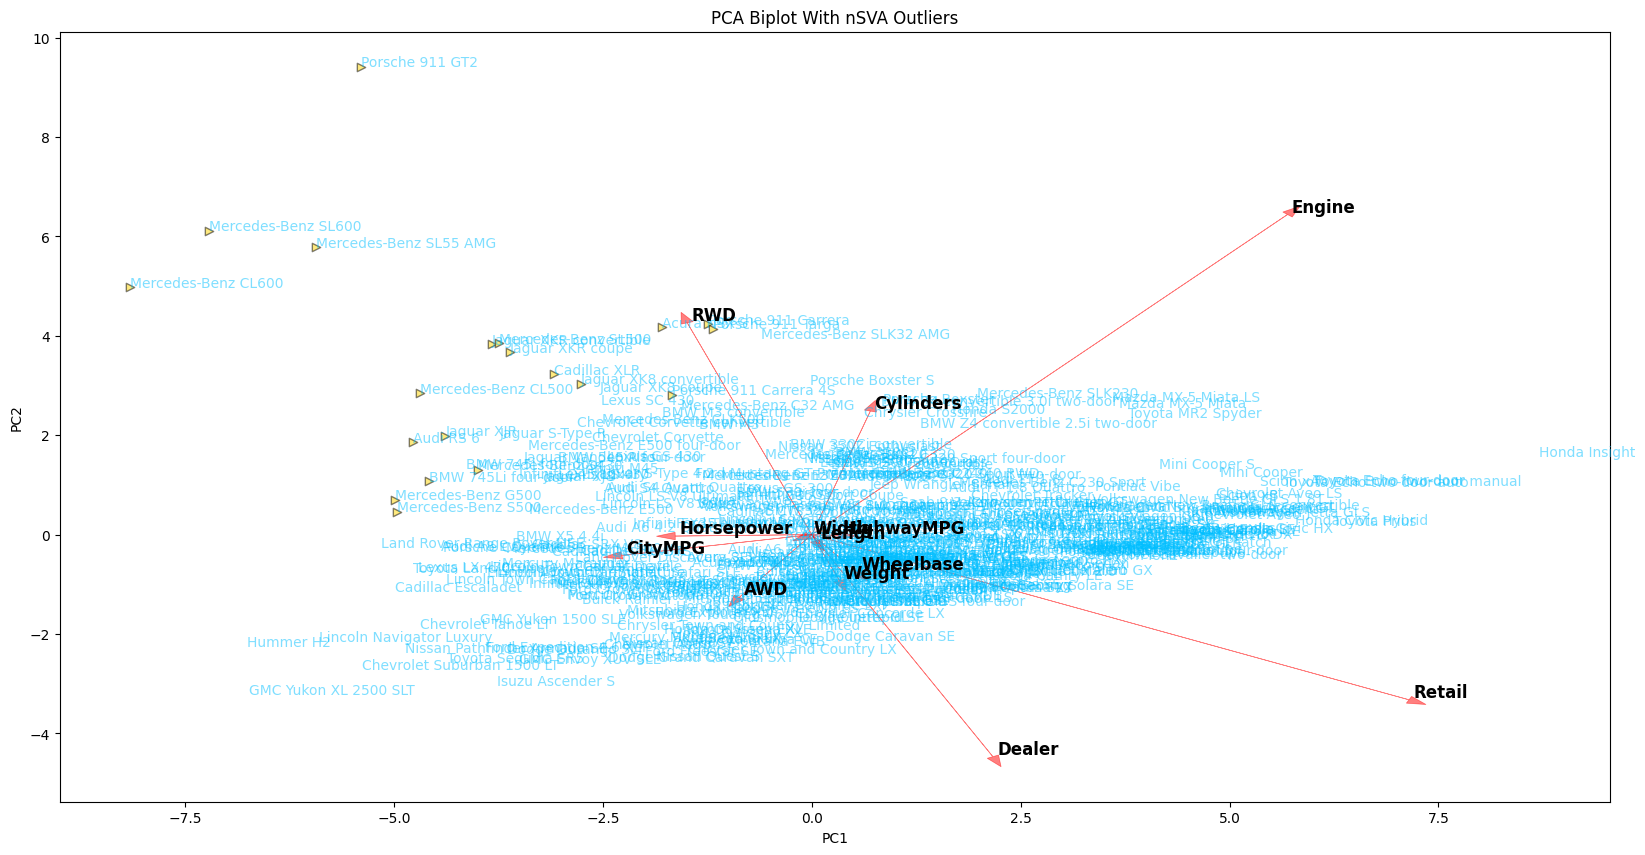

In [130]:
nsva_outliers, nsva_idx = nsva_ranking(data_2)
idx_list = list(data_2.index)
outlier_idx_list = []

top_rank_num = 20
nsva_idx = nsva_idx[0:top_rank_num]

fig = plt.figure(figsize = (20, 10))
for i in range(len(ss_PCA_data)):
  plt.scatter(ss_PCA_data[i, 0], ss_PCA_data[i, 1], marker = 'o', c = 'white', alpha = 0.5)
  plt.text(ss_PCA_data[i, 0], ss_PCA_data[i, 1], data_5_ss.index[i], color = 'deepskyblue', fontsize = 10, alpha = 0.5)
  if i in nsva_idx:
    plt.scatter(ss_PCA_data[i, 0], ss_PCA_data[i, 1], marker = '>', color = 'gold', edgecolor = 'k', alpha = 0.5)
    outlier_idx_list.append(idx_list[i])

outliers_df = data_2.loc[data_2.index.isin(outlier_idx_list)]

scale = 10
for k in range(data_5_ss.shape[1]):
  plt.text(ss_PCA_df.iloc[k,0] * scale + 0.05,
           ss_PCA_df.iloc[k,1] * scale + 0.05,
           ss_PCA_df.index[k],
           fontweight = 'bold', fontsize = 12)
  plt.arrow(0, 0, ss_PCA_df.iloc[k, 0] * scale, ss_PCA_df.iloc[k, 1] * scale, color = 'r', head_width = 0.15, linewidth = 0.5, alpha = 0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("PCA Biplot With nSVA Outliers")

In [131]:
outliers_df.reset_index(inplace = True)
outliers_df['index']

,index
0,Acura NSX S
1,Audi RS 6
2,BMW 745Li four-door
3,Cadillac XLR
4,Jaguar XJR
5,Jaguar XK8 convertible
6,Jaguar XKR coupe
7,Jaguar XKR convertible
8,Mercedes-Benz CL500
9,Mercedes-Benz CL600


# PCA Extensions

In [132]:
A = [
    [1, 2, 0],
    [7.2, 5, 9],
    [-3, 100, 5.8],
    [1, -90, 9.7],
    [2, 88, 1.2]
]
A_std_scl = StandardScaler().fit_transform(A)
A_min_max = MinMaxScaler().fit_transform(A)
A_max_abs = MaxAbsScaler().fit_transform(A)
A_rob_scl = RobustScaler().fit_transform(A)
A_pwr_trf = PowerTransformer().fit_transform(A)

In [ ]:
A_raw_pca_data, A_raw_pca_loads, A_raw_exp_var, A_raw_evr = doPCA(A)

A_std_pca_data, A_std_pca_loads, A_std_exp_var, A_std_evr = doPCA(A_std_scl)

A_mm_pca_data, A_mm_pca_loads, A_mm_exp_var, A_mm_evr = doPCA(A_min_max)

A_mabs_pca_data, A_mabs_pca_loads, A_mabs_exp_var, A_mabs_evr = doPCA(A_max_abs)

A_rob_pca_data, A_rob_pca_loads, A_rob_exp_var, A_rob_evr = doPCA(A_rob_scl)

A_pwr_pca_data, A_pwr_pca_loads, A_pwr_exp_var, A_pwr_evr = doPCA(A_pwr_trf)

In [ ]:
print("Explained Variances\n")
print("Raw Data: ", A_raw_exp_var)
print("StandardScaler: ", A_std_exp_var)
print("MinMaxScaler: ", A_mm_exp_var)
print("MaxAbsScaler: ", A_mabs_exp_var)
print("RobustScaler: ", A_rob_exp_var)
print("PowerTransformer: ", A_pwr_exp_var)

Explained Variances

Raw Data:  [5923.21143004   15.54495383   11.10961613]
StandardScaler:  [2.16366884 0.96667249 0.61965867]
MinMaxScaler:  [0.30295527 0.10914938 0.08753765]
MaxAbsScaler:  [0.70121203 0.21858919 0.13682304]
RobustScaler:  [13.45428081  0.80453911  0.2100158 ]
PowerTransformer:  [2.07218146 1.01451827 0.66330027]


In [ ]:
print("Explained Variance Ratios\n")
print("Raw Data: ", A_raw_evr)
print("StandardScaler: ", A_std_evr)
print("MinMaxScaler: ", A_mm_evr)
print("MaxAbsScaler: ", A_mabs_evr)
print("RobustScaler: ", A_rob_evr)
print("PowerTransformer: ", A_pwr_evr)

Explained Variance Ratios

Raw Data:  [0.99552014 0.00261266 0.0018672 ]
StandardScaler:  [0.57697836 0.25777933 0.16524231]
MinMaxScaler:  [0.60634431 0.21845504 0.17520064]
MaxAbsScaler:  [0.66363423 0.20687504 0.12949072]
RobustScaler:  [0.92987999 0.05560497 0.01451504]
PowerTransformer:  [0.55258172 0.27053821 0.17688007]


In [ ]:
# Calculate A_c
A = np.asmatrix(A)
n, p = A.shape
A_mean = np.mean(A, axis = 0)
A_c = A - A_mean
C = np.dot(A_c.T, A_c)/(n - 1)
C_1 = (C * C)
C_2 = C_1 + C

var_C, PCs_C = np.linalg.eig(C)
var_C_1, PCs_C_1 = np.linalg.eig(C_1)
var_C_2, PCs_C_2 = np.linalg.eig(C_2)

In [ ]:
print("PCA Extensions Problem 2\n")
print("Zero Mean of A: ")
print(A_c)
print("C: ")
print(PCs_C)
print("C_1: ")
print(PCs_C_1)
print("C_2: ")
print(PCs_C_2)

PCA Extensions Problem 2

Zero Mean of A: 
[[  -0.64  -19.     -5.14]
 [   5.56  -16.      3.86]
 [  -4.64   79.      0.66]
 [  -0.64 -111.      4.56]
 [   0.36   67.     -3.94]]
C: 
[[-1.47430660e-02  8.85912206e-01  4.63618599e-01]
 [ 9.99474153e-01 -3.35232594e-04  3.24238504e-02]
 [-2.88801049e-02 -4.63852834e-01  8.85441409e-01]]
C_1: 
[[ 1.47430660e-02  8.85912206e-01 -4.63618599e-01]
 [-9.99474153e-01 -3.35232594e-04 -3.24238504e-02]
 [ 2.88801049e-02 -4.63852834e-01 -8.85441409e-01]]
C_2: 
[[ 1.47430660e-02  8.85912206e-01 -4.63618599e-01]
 [-9.99474153e-01 -3.35232594e-04 -3.24238504e-02]
 [ 2.88801049e-02 -4.63852834e-01 -8.85441409e-01]]
